In [1]:
import pandas as pd
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
res = pd.read_csv('231026-MINT__PA-long.csv')

In [3]:
res.head(10)

,ms_file,ms_file_label,peak_label,mz_mean,mz_width,rt,rt_min,rt_max,rt_unit,intensity_threshold,...,peak_mean,peak_delta_int,peak_shape_rt,peak_shape_int,peak_mass_diff_25pc,peak_mass_diff_50pc,peak_mass_diff_75pc,peak_score,total_intensity,ms_file_size_MB
0,/data/User/luis.poncealvarez@ucalgary.ca/works...,PA006_G1_T0_230530_HILICNeg4S_Col03_RN10215_H1...,Acetoacetate,101.0244,10,42.0,36.7559,46.6258,s,0,...,1.410762e+07,106708.0,"36.81,37.07,37.33,37.6,37.86,38.12,38.39,38.65...","1372590,2196056,3248654,5418280,6871511,739284...",0.913282,1.120963,1.196483,0,536959623431,13.417633
1,/data/User/luis.poncealvarez@ucalgary.ca/works...,PA006_G1_T0_230530_HILICNeg4S_Col03_RN10215_H1...,Acetyl-Threonine,160.0615,10,93.0,88.5098,103.8289,s,0,...,2.559582e+08,11915649.0,"88.88,89.15,89.41,89.67,89.93,90.2,90.46,90.72...","79776,98528,318857,1178716,7511917,26163110,72...",1.004405,1.290398,1.385728,0,536959623431,13.417633
2,/data/User/luis.poncealvarez@ucalgary.ca/works...,PA006_G1_T0_230530_HILICNeg4S_Col03_RN10215_H1...,Adenine,134.0472,10,90.0,85.0555,95.9207,s,0,...,1.934591e+07,3160278.0,"85.2,85.47,85.73,85.99,86.26,86.52,86.78,87.04...","4332559,3399947,4100394,4145417,3727374,261823...",0.307436,0.535099,0.648930,0,536959623431,13.417633
3,/data/User/luis.poncealvarez@ucalgary.ca/works...,PA006_G1_T0_230530_HILICNeg4S_Col03_RN10215_H1...,Adenosine X,266.0895,10,82.0,102.3206,108.0000,s,0,...,3.573343e+07,8940158.0,"102.54,102.81,103.07,103.33,103.6,103.86,104.1...","3572240,7217913,18446526,35986744,50526012,650...",-4.327910,-4.213221,-4.213221,0,536959623431,13.417633
4,/data/User/luis.poncealvarez@ucalgary.ca/works...,PA006_G1_T0_230530_HILICNeg4S_Col03_RN10215_H1...,Adenosine monophosphate,346.0558,10,138.0,134.6323,143.9614,s,0,...,2.539340e+05,15193.0,"135.94,136.21,136.47,136.73,136.99,137.26,137....","23555,71303,136378,499359,403003,599582,668499...",0.489049,0.665423,0.929983,0,536959623431,13.417633
5,/data/User/luis.poncealvarez@ucalgary.ca/works...,PA006_G1_T0_230530_HILICNeg4S_Col03_RN10215_H1...,Alanine X,88.0404,10,127.2,125.5632,129.4461,s,0,...,2.422138e+05,255011.0,"125.67,125.93,126.19,126.46,126.72,126.98,127....","36432,59481,186159,277685,359358,364109,328217...",1.273108,1.446424,1.706398,0,536959623431,13.417633
6,/data/User/luis.poncealvarez@ucalgary.ca/works...,PA006_G1_T0_230530_HILICNeg4S_Col03_RN10215_H1...,Alpha Ketoglutarate,145.0143,10,124.0,98.0000,126.0000,s,0,...,1.669229e+05,215480.0,"98.08,100.18,100.71,101.23,107.28,107.8,108.06...","90646,141676,123489,107408,63683,61306,79930,7...",-0.359314,0.298327,0.403550,0,536959623431,13.417633
7,/data/User/luis.poncealvarez@ucalgary.ca/works...,PA006_G1_T0_230530_HILICNeg4S_Col03_RN10215_H1...,Arabitol,151.0612,10,101.4,98.0000,110.0000,s,0,...,3.584039e+07,964870.0,"98.08,98.34,98.6,98.87,99.13,99.39,99.66,99.92...","3704340,13891164,36333888,58788676,96492216,12...",1.333017,1.535039,1.737060,0,536959623431,13.417633
8,/data/User/luis.poncealvarez@ucalgary.ca/works...,PA006_G1_T0_230530_HILICNeg4S_Col03_RN10215_H1...,Arginine,173.1044,10,141.0,138.2582,147.3019,s,0,...,1.326856e+07,1236169.0,"138.57,138.83,139.1,139.36,139.62,139.88,140.1...","17695,131841,480412,1632088,5544680,17851954,3...",-0.326888,-0.172629,-0.018370,0,536959623431,13.417633
9,/data/User/luis.poncealvarez@ucalgary.ca/works...,PA006_G1_T0_230530_HILICNeg4S_Col03_RN10215_H1...,Ascorbate,175.0248,10,88.0,88.0000,102.9568,s,0,...,8.544650e+04,9072.0,"88.09,88.62,98.87,99.39","87262,85084,73106,96334",-0.962719,-0.679382,-0.417840,0,536959623431,13.417633


In [4]:
def get_shape(string):
    try:
        return [float(x) for x in string.split(',')]
    except:
        return np.nan

res.peak_shape_rt = res.peak_shape_rt.apply(lambda x: get_shape(x))
res.peak_shape_int = res.peak_shape_int.apply(lambda x: get_shape(x))

In [5]:
# there are 79 compounds so we are generating a figure of 81 graphs (9x9)

In [6]:
len(np.unique(res.peak_label))

79

In [7]:
79**0.5

8.888194417315589

In [8]:
# for cp in np.unique(res.peak_label):
#     for sample in res.ms_file_label[res.peak_label == cp]:
# #         print(sample)
#         try:
#             x = res.peak_shape_rt[(res.peak_label == cp) & (res.ms_file_label == sample)].iloc[0]
#             y = res.peak_shape_int[(res.peak_label == cp) & (res.ms_file_label == sample)].iloc[0]
#             plt.plot(x,y)
#         except:
#             continue
#     plt.ylabel(cp)
#     plt.xlabel('rt')
#     plt.show()

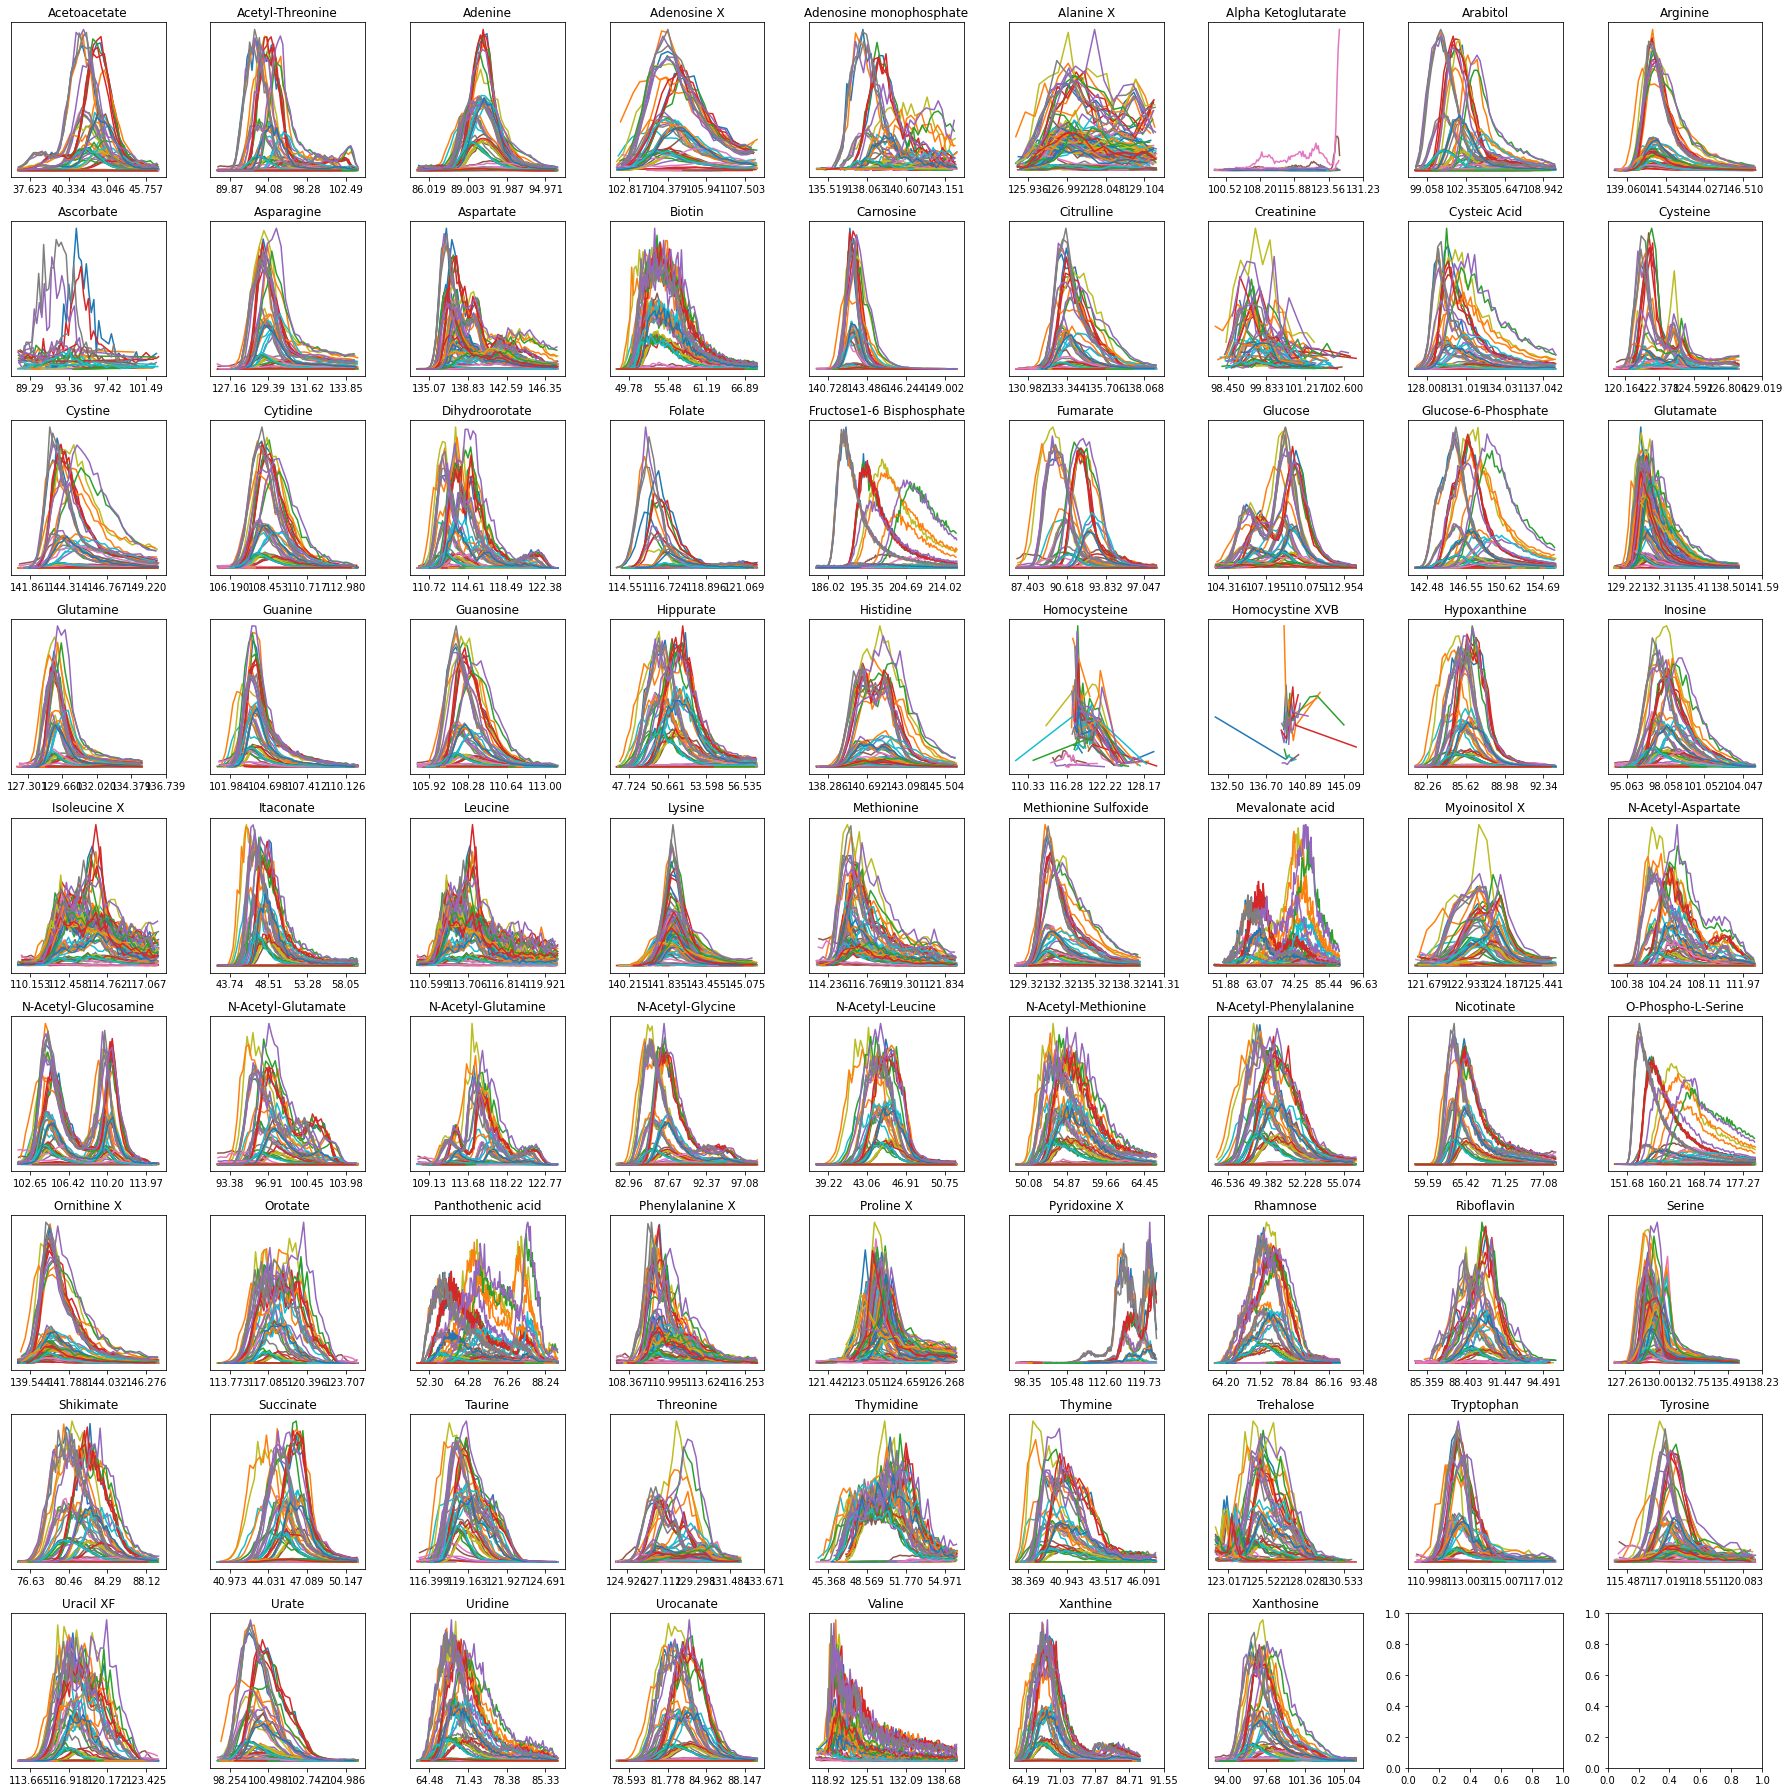

In [9]:
fig, ax = plt.subplots(ncols=9, nrows = 9, figsize = (25,25))
compounds = np.unique(res.peak_label)
for c in range(len(compounds)):
    i = int(c/9)
    j = c%9
    cp = compounds[c]
#     print(cp)
#     
    for sample in res.ms_file_label[res.peak_label == cp]:
#         print(sample)
        try:
            x = res.peak_shape_rt[(res.peak_label == cp) & (res.ms_file_label == sample)].iloc[0]
            y = res.peak_shape_int[(res.peak_label == cp) & (res.ms_file_label == sample)].iloc[0]
#             print(x)
            ax[i][j].plot(x,y)
        except:
            continue
    ax[i][j].set_yticks([])
    start, end = ax[i][j].get_xlim()
    stepsize = (end-start)/4
    ax[i][j].xaxis.set_ticks(np.arange(start + stepsize/2, end + stepsize/2, stepsize))
    ax[i][j].title.set_text(cp)

plt.tight_layout()